In [102]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [147]:
train = pd.read_csv("train_2kmZucJ.csv")
test = pd.read_csv("test_oJQbWVk.csv")
train.shape,test.shape

((7920, 3), (1953, 2))

In [148]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [149]:
train_test = pd.concat([train,test],ignore_index=True)
len(train_test)

9873

In [150]:
train_test.head(2)

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...


In [151]:
train_test[7919:].head()

,id,label,tweet
7919,7920,0.0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
7920,7921,NaN,I hate the new #iphone upgrade. Won't let me d...
7921,7922,NaN,currently shitting my fucking pants. #apple #i...
7922,7923,NaN,"I'd like to puts some CD-ROMS on my iPad, is t..."
7923,7924,NaN,My ipod is officially dead. I lost all my pict...


In [152]:
train["tweet"][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [153]:
train["tweet"][7000]

'I love plaid. #plaid #flannel #instapic #blackandwhite #instamood #iphone #apple #redplaid #blondehai http://instagr.am/p/SzO6pwhNcB/'

# Cleaning http link from the text

In [154]:
# http matches literal characters
# \S+ matches all non-whitespace characters (the end of the url)
# we replace with the empty string

result = re.sub(r"http\S+", "", str(train["tweet"][0]))
result

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [155]:
list_without_link = []
for i in range(len(train_test)):
    list_without_link.append(re.sub(r"http\S+", "", str(train_test["tweet"][i])))

In [156]:
#create a column

train_test["clean_text"] = list_without_link

In [157]:
train_test.head()

,id,label,tweet,clean_text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [158]:
# converting into lower case and any thing which is not a-zA-Z is replacing by noting
train_test["clean_text"] = train_test["clean_text"].str.lower().str.replace("[^A-Za-z ]","")
train_test.head()

,id,label,tweet,clean_text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beaut...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0.0,I'm wired I know I'm George I was made that wa...,im wired i know im george i was made that way ...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple wont even talk to m...


In [159]:
import nltk
from nltk.corpus import stopwords

stopword = set(stopwords.words("english"))

#function to remove stopwards
def stopword_revoval(text):
    text = [word for word in text.split(" ") if word not in stopword]
    return " ".join(text)

train_test["clean_text"] = train_test["clean_text"].apply(stopword_revoval)
train_test.head()

,id,label,tweet,clean_text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beaut...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0.0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute ...
4,5,1.0,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...


In [205]:
# separating test and train data after cleaning
final_test = train_test[len(train):]

final_train = train_test[:len(train)]

test_id = final_test[["id"]]

In [183]:
x = final_train["clean_text"]

# converting label into intiger
final_train["label"] = final_train["label"].astype(int)

y = final_train["label"]

In [209]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,f1_score
from sklearn.naive_bayes import MultinomialNB

In [212]:
X_train,X_val,Y_train,Y_val = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((6336,), (1584,), (6336,), (1584,))

In [216]:
vectorizer = CountVectorizer().fit(X_train)
vec_X_train = vectorizer.transform(X_train)
vec_X_val = vectorizer.transform(X_val)
vec_X_train

<6336x14934 sparse matrix of type '<class 'numpy.int64'>'
	with 69031 stored elements in Compressed Sparse Row format>

# Building Model

In [217]:
model = MultinomialNB()
model.fit(vec_X_train,Y_train)

y_pred = model.predict(vec_X_val)

accuracy_score(Y_val,y_pred)

0.9021464646464646

In [218]:
#evaloution metric is f1_score
f1_score(Y_val,y_pred)

0.8268156424581007

# ROC CURVE

In [198]:
from sklearn import metrics
predict_prob = model.predict_proba(vec_X_val)[:,1]

fpr,tpr,threshold = roc_curve(Y_val,predict_prob)

roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.955837673611111


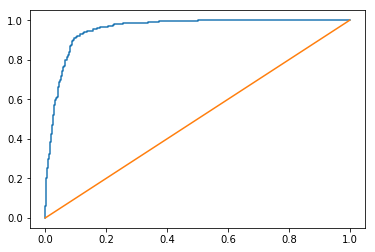

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

# predict on test data

In [202]:
final_test.head()

,id,label,tweet,clean_text
7920,7921,NaN,I hate the new #iphone upgrade. Won't let me d...,hate new iphone upgrade wont let download apps...
7921,7922,NaN,currently shitting my fucking pants. #apple #i...,currently shitting fucking pants apple imac ca...
7922,7923,NaN,"I'd like to puts some CD-ROMS on my iPad, is t...",id like puts cdroms ipad possible yes wouldnt...
7923,7924,NaN,My ipod is officially dead. I lost all my pict...,ipod officially dead lost pictures videos sos ...
7924,7925,NaN,Been fighting iTunes all night! I only want th...,fighting itunes night want music paid


In [207]:
test_vec = vectorizer.transform(final_test["clean_text"])

test_id["label"] = model.predict(test_vec)

In [219]:
# output file save as csv
test_id.to_csv("Naive_Byes_model.csv",index=False)

# ============

In [229]:
import xgboost as xgb

forest_model = xgb()

forest_model.fit(vec_X_train,Y_train)

y_pred = forest_model.predict(vec_X_val)

accuracy_score(Y_val,y_pred)

TypeError: 'module' object is not callable

In [228]:
f1_score(Y_val,y_pred)

0.0